# Application 1: Car Positioning

## Example Application


### Loading Example Data

These example data consist of two files: 

- Perceptual attribute ratings for 10 competing cars
- Customer preference ratings for these cars



In [1]:
from marketmaps.datasets import load_car_data
data = load_car_data()
df_attributes = data['attributes']
df_preferences = data['preferences']

In [2]:
df_attributes.head()

,Attractive,Quiet,Unreliable,Poorly.Built,Interesting,Sporty,Uncomfortable,Roomy,Easy.to.Service,High.Prestige,Common,Economical,Successful,Avant.garde,Poor.Value
Car,,,,,,,,,,,,,,,
G20,5.6,6.3,2.9,1.6,3.6,4.1,3.2,4.2,4.6,5.4,3.5,3.6,5.3,4.3,3.4
Ford_T_Bird,4.0,3.6,4.2,4.2,5.0,4.9,4.0,3.9,4.9,3.5,3.6,3.7,4.2,3.6,4.3
Audi_90,4.6,5.2,3.7,2.6,4.0,3.8,2.4,5.3,3.5,5.6,3.4,3.6,5.0,3.6,4.3
Toyota_Supra,5.6,4.2,2.0,2.1,4.3,6.2,3.7,3.5,4.9,5.3,2.9,3.2,5.5,4.9,3.5
Eagle_Talon,4.0,3.5,4.3,4.3,3.9,4.9,4.0,3.6,4.6,2.8,4.3,4.9,3.7,4.4,3.6


### Derive Car Positioning

In [3]:
from scipy.spatial.distance import squareform, pdist
dist_mat = squareform(pdist(df_attributes))
dist_mat.round(2)

array([[0.  , 5.28, 2.93, 3.48, 5.75, 2.7 , 3.11, 6.08, 2.29, 5.59],
       [5.28, 0.  , 4.42, 4.75, 2.28, 4.35, 4.98, 1.82, 5.67, 1.97],
       [2.93, 4.42, 0.  , 4.58, 5.25, 3.76, 2.76, 5.39, 3.21, 5.1 ],
       [3.48, 4.75, 4.58, 0.  , 5.46, 3.51, 3.95, 4.73, 3.41, 4.91],
       [5.75, 2.28, 5.25, 5.46, 0.  , 4.26, 5.35, 3.01, 6.19, 0.99],
       [2.7 , 4.35, 3.76, 3.51, 4.26, 0.  , 3.27, 5.12, 3.07, 4.19],
       [3.11, 4.98, 2.76, 3.95, 5.35, 3.27, 0.  , 5.9 , 2.69, 5.07],
       [6.08, 1.82, 5.39, 4.73, 3.01, 5.12, 5.9 , 0.  , 6.34, 2.49],
       [2.29, 5.67, 3.21, 3.41, 6.19, 3.07, 2.69, 6.34, 0.  , 5.85],
       [5.59, 1.97, 5.1 , 4.91, 0.99, 4.19, 5.07, 2.49, 5.85, 0.  ]])

In [4]:
from marketmaps.mapping import CMDS
map_coords = CMDS(n_dims= 2).fit_transform(dist_mat)
map_coords.round(2)

array([[-2.54,  0.04],
       [ 2.43, -0.3 ],
       [-1.53, -1.68],
       [-1.09,  2.61],
       [ 2.9 , -0.79],
       [-1.  ,  0.11],
       [-2.01, -0.98],
       [ 3.1 ,  0.95],
       [-2.96,  0.27],
       [ 2.71, -0.23]])

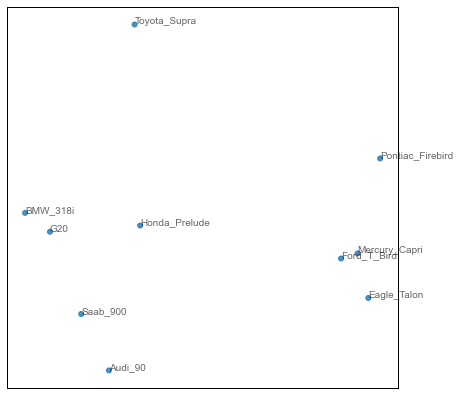

In [5]:
from marketmaps.printer import draw_map
import matplotlib.pyplot as plt

car_labels = df_attributes.index

map = draw_map(
    map_coords, 
    labels = car_labels, 
    fig_size = (7,7),
    annotate = 'labels')

### Explain Positioning via Property Fitting


In [6]:
import statsmodels.api as sm



0.1999784787715831

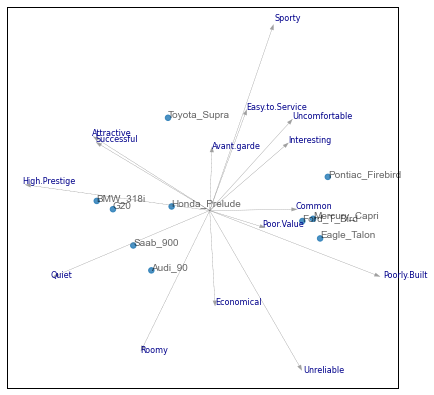

In [26]:
map = draw_map(
    map_coords, 
    labels = car_labels, 
    fig_size = (7,7),
    scatter_kws= {'s': 30},
    annotate = 'labels')

ax = map.axes[0]
for attribute in df_attributes.columns:
    X = map_coords
    y = df_attributes[attribute]
    est=sm.OLS(y, X)
    result = est.fit().params
    result['x1']
    result['x2']
    ax.arrow(0,0,result['x1']*10,result['x2']*10, linestyle = '--', lw = .25, alpha = .75, width = .001, color = 'grey',  head_width = 0.1)
    ax.text(result['x1']*10.5, result['x2']*10.5, attribute, fontdict= {'size': 8, 'color': 'darkblue', 'weight': 'normal'})

Different mapping methods require different input data. Here, the input data connsists of *pairiwse similarities*. To map them to 2D space via Multidimensional Scaling, 
we require *pariwise distances*. Among other features, `marketmaps.preprocessing` provides various transformations between such different types of relationship data.

One simple way to do so is by mirroring:  

In [ ]:
from marketmaps.preprocessing import sim2dist
dist_mat = sim2dist(sim_mat, transformation= 'mirror')
print("Smallest matrix entry: {0:.2f} \n Largest matrix entry: {1:.2f}".format(np.min(dist_mat), np.max(dist_mat)))
print("Distance between {0} and {1}: {2:.2f}".format(labels[0], labels[6], dist_mat[0,6]))
print("Distance between {0} and {1}: {2:.2f}".format(labels[0], labels[3], dist_mat[0,3]))

### Step 3: Mapping relationship data to lower-dimensional space

The `marketmaps.mapping` provides implementations of multiple different mapping methods. 

Here, we apply (classic) Multidimensional Scaling (aka. Principal Coordinate Analysis):

In [ ]:
from marketmaps.mapping import CMDS
model = CMDS(n_dims = 2).fit(dist_mat)
map_coords = model.Y

The resultant model output is a 2D array of shape (n_samples, 2) containing the map coordinates.

In [ ]:
map_coords.shape

### Step 4: Drawing market maps

`marketmaps.mapping` provides intuitive functions (such as ```draw_map()```), which can create highly customizable maps.  

In [ ]:
from marketmaps.printer import draw_map
draw_map(Y = map_coords,
        c = cluster,
        labels = labels,
        annotate = 'labels', 
        fig_size= (7,7),
        title_str = "Classic Scaling of TNIC Data")

### Step 5: Evaluating market maps

Further, `marketmaps.metrics` provides typically used metrics to evaluate the resultant maps' goodness-of-fit.  

In [ ]:
from marketmaps.metrics import adjusted_hitrate_score 
score = adjusted_hitrate_score(dist_mat, map_coords, n_neighbors = 3, input_type= 'distance')

print("Hitrate of 3-nearest neighbor recovery (adjusted or random agreement): {0:.2f}".format(score))

*** WORK IN PROGRESS: PROPERTY FITTING***